In [ ]:
# instalar a biblioteca Yahoo Finance
!pip install yfinance

In [11]:
# importando o Yahoo Finance e o módulo para análise dos dados
import yfinance as yf
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
def data_entry():
    # as variáveis foram definidas como globais para poderem ser usadas fora da função
    global stock_code, start_date, end_date, data

    #irá rodar este código caso não existe erro:
    while True:
        try:
            print('Código da ação pode ser encontrado neste link: https://br.financas.yahoo.com/')
            stock_code = input("Digite o código da ação (ex: BBDC4.SA): ").upper()
            start_date = input("Digite a data de início no formato YYYY-MM-DD: ")
            end_date = input("Digite a data de fim no formato YYYY-MM-DD: ")

            # strptime: "String To Parse Time" - transforma string para datetime
            # O código dt.datetime.strptime é usado para converter uma string que representa uma data e hora em um objeto datetime.
            # modulo yfinance end diminui 1 dia do dado input, para consertar isso usa-se o timedelta e adiciona-se 1 dia de volta
            end_date_adjusted = dt.datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1)
            # criação e exibição de um dataframe
            # yf.download aceita tanto strings quanto objetos datetime como parâmetros de start e end.
            data = yf.download(stock_code, start=start_date, end=end_date_adjusted )
            display(data)
            break

        # irá rodar estas mesnagens caso existe um erro
        except Exception as e:
          print(f"\nErro: {e}")
          print('''
          Siga esta padrão para entrada de dados. Exemplo:
          Digite o código da ação (ex: BBDC4.SA):BBDC4.SA
          Digite a data de início no formato YYYY-MM-DD: 2008-01-01
          Digite a data de fim no formato YYYY-MM-DD: 2023-01-01
          ''')

data_entry()

Código da ação pode ser encontrado neste link: https://br.financas.yahoo.com/
Digite o código da ação (ex: BBDC4.SA): bbdc4.sa
Digite a data de início no formato YYYY-MM-DD: 2008-01-01
Digite a data de fim no formato YYYY-MM-DD: 2023-09-13


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,23.535587,23.635349,21.989271,22.030840,11.726600,0
2008-01-03,22.113974,22.317656,21.490459,21.577751,11.487497,0
2008-01-04,21.781433,21.968487,21.137135,21.324188,11.352515,5694095
2008-01-07,21.428108,21.993427,21.415638,21.719082,11.562745,0
2008-01-08,22.113974,22.525494,21.931076,22.051622,11.739782,0
...,...,...,...,...,...,...
2023-09-06,14.660000,14.670000,14.370000,14.380000,13.845853,30673700
2023-09-08,14.350000,14.630000,14.210000,14.380000,13.845853,26255000
2023-09-11,14.520000,14.750000,14.430000,14.650000,14.105824,27501400


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3898 entries, 2008-01-02 to 2023-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3898 non-null   float64
 1   High       3898 non-null   float64
 2   Low        3898 non-null   float64
 3   Close      3898 non-null   float64
 4   Adj Close  3898 non-null   float64
 5   Volume     3898 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 213.2 KB


In [66]:
# valores estatísticos da ação na fechamento
#round formatará para ficar com duas casas decimais

arr_stock_close = np.array(data.Close)

minimum = np.min(arr_stock_close)
print(f"Valor mínimo da ação {stock_code} no fechamento:", round(minimum,2))

maximum = np.max(arr_stock_close)
print(f"Valor máximo da ação {stock_code} no fechamento:", round(maximum,2))

mean = np.mean(arr_stock_close)
print(f"Valor médio da ação {stock_code} no fechamento:", round(mean,2))

median = np.median(arr_stock_close)
print(f"Mediana da ação {stock_code} no fechamento:", round(median,2))

standart_deviation = np.std(arr_stock_close)
print(f"O desvio padrão dos valores de {stock_code} no fechamento:", round(standart_deviation,2))


Valor mínimo da ação BBDC4.SA no fechamento: 8.0
Valor máximo da ação BBDC4.SA no fechamento: 29.61
Valor médio da ação BBDC4.SA no fechamento: 15.97
Mediana da ação BBDC4.SA no fechamento: 14.84
O desvio padrão dos valores de BBDC4.SA no fechamento: 4.81


In [67]:
# Encontrar os índices dos valores NaN
missing_values = np.isnan(data.Close).sum()
print(f"NaN encontrados: {missing_values}")
# Tratando os valores ausentes (substituindo pela média, por exemplo)
if missing_values > 0:
    data['Close'].fillna(mean, inplace=True)

NaN encontrados: 0


In [68]:
# criação da coluna variação percentual: preço de fechamento (Close) de um dia para o outro no DataFrame
# O método pct_change() calcula a variação percentual entre o valor atual e um valor anterior.
# Multiplicar por 100 transforma a variação em porcentagem.
data['Variação Percentual'] = data['Close'].pct_change() * 100

# dados mensais da coluna ‘Variação Percentual’.
# O método resample('M') é usado para reamostrar os dados em uma frequência mensal.
# O método agg() é então usado para calcular a média (mean) e a mediana (median) da variação percentual para cada mês.
monthly_summary = data.resample('M').agg({'Variação Percentual': ['mean', 'median']})

print(monthly_summary)


           Variação Percentual          
                          mean    median
Date                                    
2008-01-31           -0.593334 -1.021111
2008-02-29            0.668706  0.704487
2008-03-31           -0.355859 -1.192180
2008-04-30            0.795162  0.575581
2008-05-31            0.162953 -0.166680
...                        ...       ...
2023-05-31            0.534937  0.258624
2023-06-30            0.289736  0.231889
2023-07-31            0.070769  0.061377
2023-08-31           -0.453557 -0.520494
2023-09-30           -0.042671  0.133779

[189 rows x 2 columns]


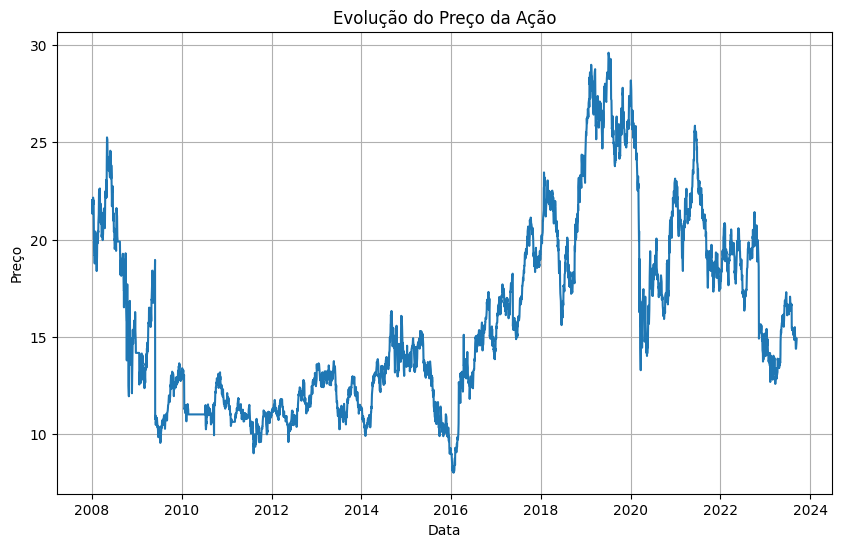

In [69]:
plt.figure(figsize=(10, 6))
# gráfico de linha da ação
plt.plot(data.index, data["Close"])
plt.xlabel('Data')     # rótulo do eixo X
plt.ylabel('Preço')   # rótulo do eixo Y
plt.title('Evolução do Preço da Ação')  # Título do Gráfico
plt.grid(True)        # Linhas de grades no gráfico
plt.show()            # Exibe o Gráfico

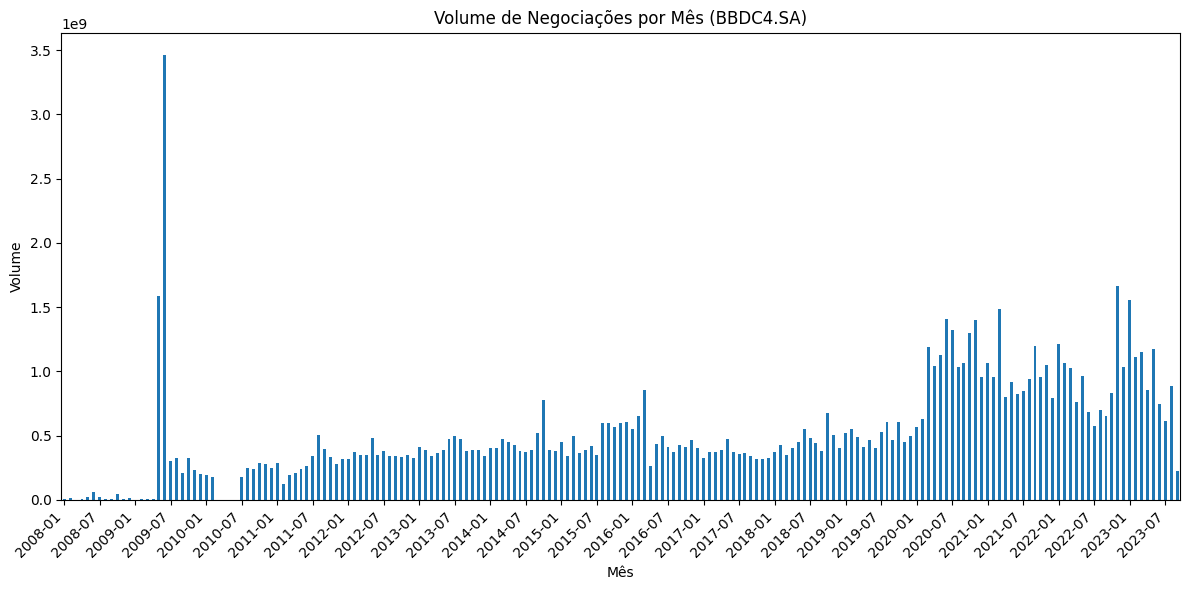

In [70]:
plt.figure(figsize=(12, 6))
# Reamostragem de 'Volume' por mês e soma dos valores
monthly_volume = data['Volume'].resample('M').sum()
monthly_volume.plot(kind='bar', title=f'Volume de Negociações por Mês ({stock_code})', xlabel='Mês', ylabel='Volume')
# Rotacionar as etiquetas do eixo x e as mostra de 6 em 6 meses para melhor legibilidade
# strftime: "String From Time" - transforma datetime em string
# date.strftime('%Y-%m') formata a data correspondente(date) mostrando o ano e o mês
# i, date in enumerate descompacta cada elemento da enumeração, onde i é a posição do índice e date é o valor correspondente do índice
# if i % 6 verifica se o índice atual(i) é um múltiplo de 6.
# ha='right' alinhamento dos xticks à direita
plt.xticks(range(0, len(monthly_volume.index), 6), [date.strftime('%Y-%m') for i, date in enumerate(monthly_volume.index) if i % 6 == 0], rotation=45, ha='right')
plt.tight_layout()
plt.show()

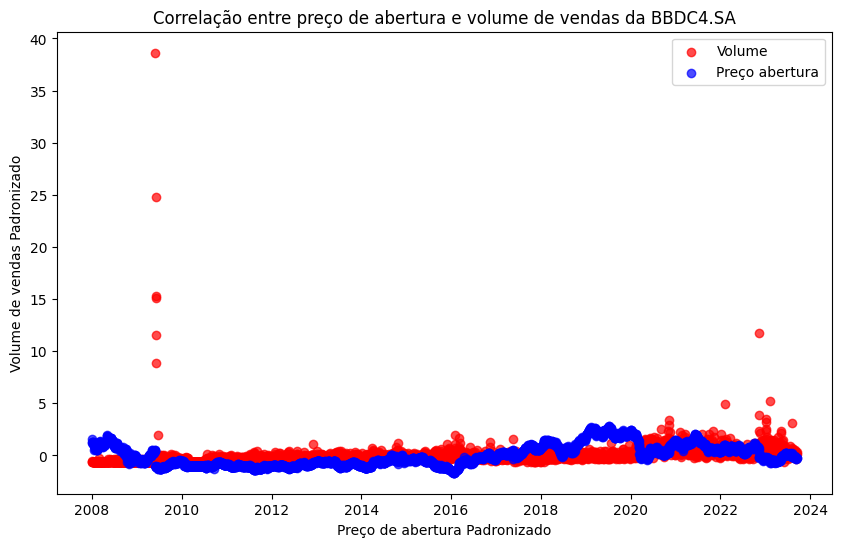

In [71]:
# print(data['Volume'])

from sklearn.preprocessing import StandardScaler

# normalização dos valores
scaler = StandardScaler()
open_norm = scaler.fit_transform(data['Open'].values.reshape(-1, 1))
volume_norm = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))

plt.figure(figsize=(10, 6))


# Cria o o grafico de Volume
plt.scatter(data.index, volume_norm, label='Volume', color='red', alpha=.7)
# Cria o o grafico de Open
plt.scatter(data.index, open_norm, label='Preço abertura', color='blue', alpha=.7)

plt.xlabel('Preço de abertura Padronizado')
plt.ylabel('Volume de vendas Padronizado')
plt.title(f'Correlação entre preço de abertura e volume de vendas da {stock_code}') # Título do Gráfico
plt.legend()
plt.show()